# Breeden Litzenberger

The theory behind obtaining the expected distribution of price returns at different times from the options market prices.

### Call Option Price under Risk-Neutral Measure

Options are something beautiful. A non linear function that takes into account two values, the T and K. Is it thanks to this properties that its price has implicit the expected distribution of future prices.

$$
Call Payoff = \mathbb{E}^{\mathbb{Q}}[\max(S_T - K, 0)]
$$

The price of a European call option at time $t = 0$ under the risk-neutral measure $\mathbb{Q}$ is:

$$
C = e^{-rT} \mathbb{E}^{\mathbb{Q}}[\max(S_T - K, 0)]
$$

Where:  
- $C$: Call option price at time 0  
- $r$: Risk-free rate  
- $T$: Time to maturity  
- $S_T$: Underlying asset price at maturity  
- $K$: Strike price  
- $\mathbb{E}^{\mathbb{Q}}$: Expectation under the risk-neutral measure (risk-neutral measure = adding risk free rate)


This expectation can be written as an integral using the risk-neutral probability density function $f_{S_T}^{\mathbb{Q}}(s)$:

$$
C = e^{-rT} \int_K^{\infty} (s - K) f_{S_T}^{\mathbb{Q}}(s) \, ds
$$

The risk-neutral probability that the option expires in the money is:

$$
\mathbb{Q}(S_T > K) = \int_K^{\infty} f_{S_T}^{\mathbb{Q}}(s) \, ds = 1 - F_{S_T}^{\mathbb{Q}}(K)
$$

Without assuming a specific model (like lognormal under geometric Brownian motion), the call price remains in this general integral form. A closed-form expression using standard CDFs (e.g., Black-Scholes) requires specifying the distribution of $S_T$.

---

#### But first of all, wtf does "Risk Neutral" mean?

"Risk neutral" refers to a hypothetical investor who **does not care about risk**—they only care about **expected returns**. In other words, they value a risky asset **based on its expected payoff**, **discounted at the risk-free rate**.

This is **not** how most people behave in reality (we're usually risk-averse), but it’s a useful simplification for pricing financial instruments. Under **no arbitrage** assumptions, we can price derivatives **as if** the world were risk-neutral. This leads to clean mathematical models and fair pricing with no arbitrage opportunities.

In reality, investors are **risk-averse**, meaning they prefer safer assets and demand **higher expected returns** for holding riskier, more volatile ones. This is because there’s always some level of **uncertainty** about an asset's future payoff. The greater the volatility (or risk), the larger the **"discount"** investors apply to its value to compensate for that uncertainty.

However, in the **risk-neutral world**, we ignore these risk preferences. We assume that the only guaranteed outcome is the return of a **risk-free asset**, typically modeled as the interest rate set by the **Central Bank**. This risk-free rate becomes the baseline from which we derive the prices of all other financial instruments.

Under the **risk-neutral measure**, the price of an option is simply the **expected value of its payoff**, discounted at the risk-free rate. It no longer depends on how risk-averse market participants are. In other words, the option's price reflects its **probability-weighted payoff**, assuming investors are indifferent to risk.

---

### Put-Call Parity and No-Arbitrage

From **no arbitrage theory**, we derive the **Put-Call Parity**:

$$
C = S_0 + P - K e^{-rT}
$$

Where:

- $ C $ = price of a European **Call** option  
- $ P $ = price of a European **Put** option  
- $ S_0 $ = current price of the **underlying asset**  
- $ K $ = **strike** price  
- $ r $ = **risk-free** interest rate  
- $ T $ = time to **maturity**

This equation ensures that there is **no arbitrage opportunity** between these instruments.

---

### A Quick Arbitrage Example

Let’s say the market violates Put-Call Parity. For example, if:

$$
C > S_0 + P - K e^{-rT}
$$

You could do the following arbitrage trade:

1. **Sell** the overpriced Call  
2. **Buy** the underlying stock $ S_0 $  
3. **Buy** a Put option with the same strike and expiry  

This combination locks in a **risk-free profit** at time 0, no matter what happens at maturity.

---

### Synthetic Call

In fact, we can **rearrange** Put-Call Parity to show:

$$
C = S_0 + P - K e^{-rT} \quad \Rightarrow \quad C = S + P \quad \text{(when } K = S_0 \text{ and } r = 0)
$$

This tells us that we can **replicate** a Call option by:

- **Buying the underlying asset**
- **Buying a Put option** with the same strike and expiry

This is called a **synthetic call**.

---

### Example: Payoffs at $ T = 0 $ and $ T = \text{maturity} $

Let’s assume:

- $ S_0 = 100 $  
- $ K = 100 $  
- $ r = 0 $  
- $ T = 1 $ year  
- $ P = 5 $ (Put price)  
- Then $ C = 105 - 100 = 5 $

#### Synthetic Call Setup:
- Buy 1 share of stock: pay 100  
- Buy 1 Put option: pay 5  
- Total cost: **105** (if it as a future, cost would be 0)  
- Equivalent to buying a Call

#### Payoffs at maturity:

| Stock Price at T | Stock (S) | Put (P) Payoff | Synthetic Call = S + P | Real Call Payoff |
|------------------|-----------|----------------|------------------------|------------------|
| 90               | 90        | 10             | 100                    | 0                |
| 100              | 100       | 0              | 100                    | 0                |
| 110              | 110       | 0              | 110                    | 10               |

Now, compare:

- The **synthetic call** (S + P) gives the **same payoff** as a real Call.
- So by buying the Put and the underlying asset, you’re replicating the Call.


### Extracting the Risk-Neutral Market-Implied Distribution from Option Prices

We aim to infer the market's **risk-neutral expected distribution** of the underlying asset price at maturity $T$ (e.g., 1 months), directly from observed European option prices.

---

#### Step 1: Use Call Option Prices for a Fixed Maturity

Suppose we have market prices of European call options $C(K)$ for different strike prices $K$, all with the same time to maturity $T = 1$ months.

These prices reflect the market's expectation (under the risk-neutral measure $\mathbb{Q}$) of the asset price distribution at time $T$.

---

#### Step 2: Link Option Prices to the Risk-Neutral CDF

Differentiate the call price with respect to strike \( K \):

$$
\frac{\partial C(K, T)}{\partial K} = -e^{-rT} \cdot Q(S_T > K)
$$

This gives the **risk-neutral cumulative distribution function (CDF)** of $ S_T $.

**Interpretation**:  
This tells us the **risk-neutral probability** that the future asset price $ S_T $ will be **greater than** strike $ K $.

---

#### Step 3: Take Second Derivative to Get the Risk-Neutral PDF

Now differentiate again with respect to $ K $:

$$
\frac{\partial^2 C(K, T)}{\partial K^2} = e^{-rT} \cdot f^{\mathbb{Q}}(K)
$$

Where:

- $ f^{\mathbb{Q}}(K) $ is the **risk-neutral probability density function (PDF)** evaluated at $ K $

So:

$$
f^{\mathbb{Q}}(K) = e^{rT} \cdot \frac{\partial^2 C(K, T)}{\partial K^2}
$$

This is the **Breeden-Litzenberger formula**.

## Code Implementation

Imports:

In [81]:
import yfinance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import brentq
from scipy.interpolate import UnivariateSpline, make_splrep
import datetime

functions:

In [84]:
# Put-Call Parity Calculations
def calculate_parity_price(S0, K, r, T, price, option_type, q=0.0121):
    """Calculate price from parity depending on option type."""
    disc_S = S0 * np.exp(-q * T)
    disc_K = K * np.exp(-r * T)
    return price + disc_S - disc_K if option_type == 'put' else price - disc_S + disc_K

# Build unified parity tables
def build_parity_tables(C, P):
    """Create parity tables with unified strike list and corresponding mid prices."""
    strikes = np.union1d(C['strike'], P['strike'])
    C_table = pd.DataFrame({'strike': strikes})
    P_table = pd.DataFrame({'strike': strikes})
    C_table.loc[C_table['strike'].isin(C['strike']), 'mid'] = C['mid'].values
    P_table.loc[P_table['strike'].isin(P['strike']), 'mid'] = P['mid'].values
    return C_table, P_table

# Find closest strike to current price
def get_closest_strike(strikes, S0):
    return strikes[np.abs(strikes - S0).argmin()]

# Estimate risk-free rate using put-call parity
def compute_r(S0, P, C, k_parity, T, q=0.0121):
    if T <= 0:
        raise ValueError("T must be positive.")
    P_mid = P.loc[P['strike'] == k_parity, 'mid'].values[0]
    C_mid = C.loc[C['strike'] == k_parity, 'mid'].values[0]
    val = (S0 * np.exp(-q * T) - (C_mid - P_mid)) / k_parity
    if val <= 0:
        raise ValueError("Log argument must be positive.")
    return -np.log(val) / T

# Fill missing parity prices for options using parity relations
def fill_parity_values(S0, C, P, T):
    strikes_common = np.intersect1d(C['strike'], P['strike'])
    C_parity, P_parity = build_parity_tables(C, P)
    C_init = C_parity.copy()

    k_parity = get_closest_strike(strikes_common, S0) if len(strikes_common) else S0
    r = compute_r(S0, P, C, k_parity, T) if len(strikes_common) else 0.04

    # Fill Call parity left of k_parity
    mask_C = (C_parity['strike'] < k_parity) & (P_parity['mid'] > 0)
    mask_P_data = (P['strike'] < k_parity) & (P['mid'] > 0)
    C_vals = calculate_parity_price(S0, P.loc[mask_P_data, 'strike'], r, T, P.loc[mask_P_data, 'mid'], 'put')
    C_parity.loc[mask_C, 'mid'] = C_vals.values
    C_parity.dropna(inplace=True)

    # Fill Put parity right of k_parity
    mask_P = (P_parity['strike'] > k_parity) & (C_init['mid'] > 0)
    mask_C_data = (C['strike'] > k_parity) & (C['mid'] > 0)
    P_vals = calculate_parity_price(S0, C.loc[mask_C_data, 'strike'], r, T, C.loc[mask_C_data, 'mid'], 'call')
    P_parity.loc[mask_P, 'mid'] = P_vals.values
    P_parity.dropna(inplace=True)

    return C_parity, P_parity, r, k_parity

# Black-Scholes Call and Put Pricing
def bs_price(S, K, T, r, sigma, q=0.0121, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option_type == 'call':
        return S * np.exp(-q*T) * norm.cdf(d1) - K * np.exp(-r*T) * norm.cdf(d2)
    else:
        return K * np.exp(-r*T) * norm.cdf(-d2) - S * np.exp(-q*T) * norm.cdf(-d1)

# Implied Volatility Solver
def implied_volatility(price, S, K, T, r, q, type='call'):
    def objective(sigma):
        return bs_price(S, K, T, r, sigma, q, type) - price
    try:
        return brentq(objective, 1e-6, 5.0)
    except ValueError:
        return np.nan

# Log-normal PDF
def bs_pdf(x, mu, sigma):
    if x <= 0:
        return 0.0
    return (1 / (x * sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((np.log(x) - mu) / sigma)**2)

# Compute Implied Volatility DataFrame
def compute_implied_volatility(C_parity, S0, T, r, q, implied_volatility_func, type='call'):
    IV = C_parity[C_parity['mid'] > 0].copy()
    IV['implied_volatility'] = IV.apply(
        lambda row: implied_volatility_func(row['mid'], S0, row['strike'], T, r, q, type), axis=1)
    IV['implied_volatility'] = IV['implied_volatility'].interpolate(method='linear', limit_direction='both')
    return IV[IV['implied_volatility'] > 0][['strike', 'mid', 'implied_volatility']]

# Unified Black-Scholes pricing for both call and put
def bs_option_price(S, K, T, r, sigma, q=0.0121, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option_type == 'call':
        return S * np.exp(-q*T) * norm.cdf(d1) - K * np.exp(-r*T) * norm.cdf(d2)
    else:
        return K * np.exp(-r*T) * norm.cdf(-d2) - S * np.exp(-q*T) * norm.cdf(-d1)

# Compute option prices from smoothed implied volatility curve
def compute_prices_from_IV(IV_smooth, S0, T, r, upper_bound, lower_bound, q=0.0121):
    strikes = np.arange(lower_bound, upper_bound, 1)

    # Compute call and put prices using IV curve
    call_prices = [bs_option_price(S0, K, T, r, IV_smooth(K), q, 'call') for K in strikes]
    put_prices = [bs_option_price(S0, K, T, r, IV_smooth(K), q, 'put') for K in strikes]

    # Enforce monotonicity: calls non-increasing, puts non-decreasing
    for i in range(1, len(call_prices)):
        if call_prices[i] > call_prices[i - 1]:
            call_prices[i] = call_prices[i - 1]
    for i in range(len(put_prices) - 2, -1, -1):
        if put_prices[i] > put_prices[i + 1]:
            put_prices[i] = put_prices[i + 1]

    return pd.DataFrame({'strike': strikes, 'call_price': call_prices, 'put_price': put_prices})


Lets get YFinance Data:

In [75]:
ticker = yfinance.Ticker('^SPX')
options = ticker.options
expiration_date_all = options

# Filter out the expiration dates that are not Fridays
expiration_date_all = [
    datetime.datetime.strptime(date, '%Y-%m-%d').date()
    for date in expiration_date_all[2:] 
    if True # datetime.datetime.strptime(date, '%Y-%m-%d').date().weekday() == 4
]
diffs_days = [(date - datetime.datetime.now().date()).days
                for date in expiration_date_all]
expiration_date = expiration_date_all[1] # this idx is for example
expiration_date = expiration_date.strftime('%Y-%m-%d')
today = datetime.datetime.now().date()
today = '2025-05-30'
today = datetime.datetime.strptime(today, '%Y-%m-%d').date()
T = (pd.to_datetime(expiration_date) - pd.to_datetime(today)).days / 365.0
S0 = ticker.history(period='1d')['Close'].iloc[-1] - 4.6 # The future price is for 5pm, but last option price is for 4:15, we need the future price at 4:15pm

# bound_upper = S0 * 1.6
# bound_lower = S0 * 0.4
bound_upper = 8000
bound_lower = 3000

print("Selected expiration date: ", expiration_date)
print("Today: ", today)
print("T: ", T)
print("Current SP500 price: ", S0)

Selected expiration date:  2025-06-05
Today:  2025-05-30
T:  0.01643835616438356
Current SP500 price:  5907.08994140625


Lets get only Options that makes sence, the ones that have minumum volume and have been traded recently:

In [76]:
C = ticker.option_chain(expiration_date).calls
C['lastTradeDate'] = pd.to_datetime(C['lastTradeDate']).dt.date
C = C[(C['lastTradeDate'] > today - datetime.timedelta(days=10))]
C = C[C['volume'] > 10]
C = C[(C['bid'] > 0) & (C['ask'] > 0)]
C['mid'] = (C['bid'] + C['ask']) / 2
#C['mid'] = C['ask'] # 
C = C[['strike', 'mid']]
C = C.sort_values(by='strike')
#C = C.dropna(how='any')

C = C[(C['strike'] >= bound_lower) & (C['strike'] <= bound_upper)]
print(f'number of calls: {len(C)}')

number of calls: 66


In [77]:
P = ticker.option_chain(expiration_date).puts
P['lastTradeDate'] = pd.to_datetime(P['lastTradeDate']).dt.date
P = P[(P['lastTradeDate'] > today - datetime.timedelta(days=30))]
P = P[(P['volume'] > 10)]
P = P[(P['bid'] > 0) & (P['ask'] > 0)]
P['mid'] = (P['bid'] + P['ask']) / 2
#P['mid'] = P['bid'] 
P = P[['strike', 'mid']]
P = P.sort_values(by='strike')
#P = P.dropna(how='any')

P = P[(P['strike'] >= bound_lower) & (P['strike'] <= bound_upper)]
print(f'number of puts: {len(P)}')

number of puts: 100


Lets get Options data. For the Calls that are below strike, we will calculate its price by the Put parity if we have Put prices. This way we get more data but still good quality:

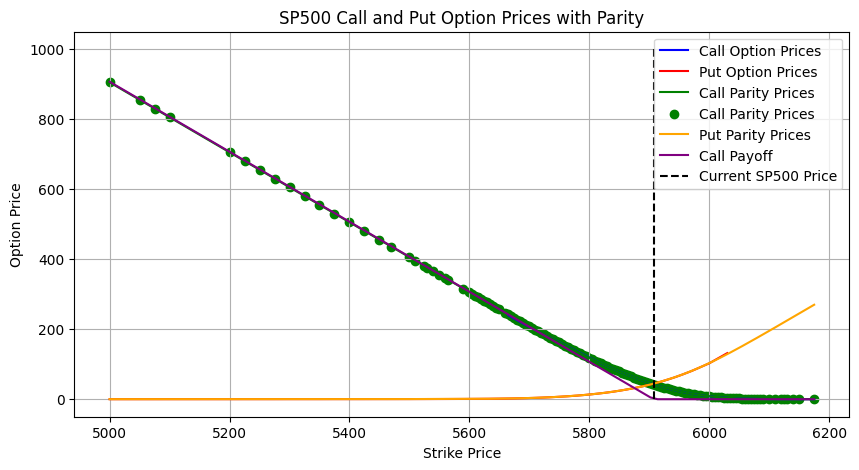

In [78]:
C_parity, P_parity, r, k_parity = fill_parity_values(S0, C, P, T)

plt.figure(figsize=(10, 5))
plt.plot(C['strike'], C['mid'], label='Call Option Prices', color='blue')
plt.plot(P['strike'], P['mid'], label='Put Option Prices', color='red')
plt.plot(C_parity['strike'], C_parity['mid'], label='Call Parity Prices', color='green')
plt.scatter(C_parity['strike'], C_parity['mid'], color='green', marker='o', label='Call Parity Prices')
plt.plot(P_parity['strike'], P_parity['mid'], label='Put Parity Prices', color='orange')
# plot payoff of call

# plot payoff of a call for each strike
strikes_payoff = np.linspace(P_parity['strike'].min(), P_parity['strike'].max(), 100)
payoff_call = np.maximum((S0 * np.ones(100)) - strikes_payoff, 0)
plt.plot(strikes_payoff, payoff_call, label='Call Payoff', color='purple')

plt.vlines(S0, 0, 1000, color='black', linestyle='--', label='Current SP500 Price')
plt.title('SP500 Call and Put Option Prices with Parity')
plt.xlabel('Strike Price')
plt.ylabel('Option Price')
plt.legend()
plt.grid()
plt.show()

Lets check its derivative, it shoudgo from -1 to 0 in case of calls

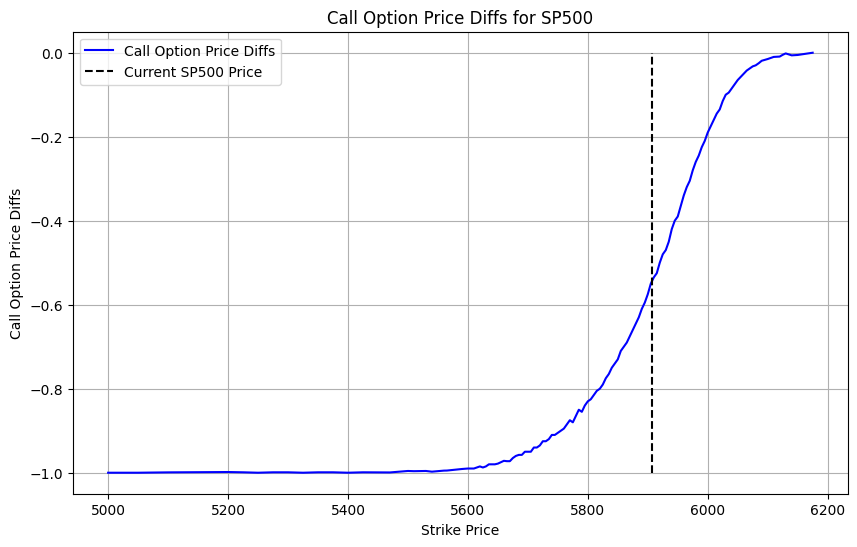

In [67]:
dC_strike = np.gradient(C_parity['mid'], C_parity['strike'])

plt.figure(figsize=(10, 6))
plt.plot(C_parity['strike'], dC_strike, label='Call Option Price Diffs', color='blue')
plt.vlines(S0, -1, 0, color='black', linestyle='--', label='Current SP500 Price')
plt.xlabel('Strike Price')
plt.ylabel('Call Option Price Diffs')
plt.title('Call Option Price Diffs for SP500')
plt.legend()
plt.grid()
plt.show()

Now we are going to obtain the IV of the Call pries using Black Scholes model. why?. Becouse this Implieds Volatilities are easier to fit with a cubic spline.

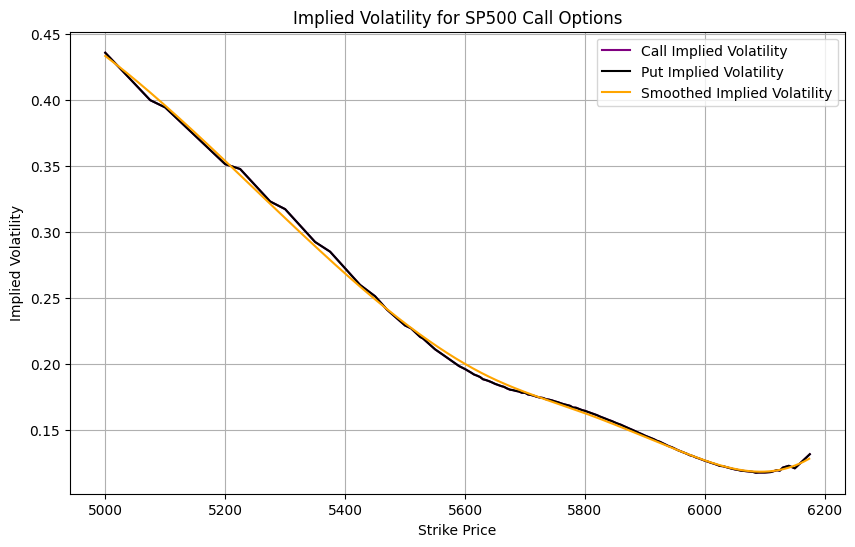

In [82]:
q = 0.0121
IV_call = compute_implied_volatility(C_parity, S0, T, r, q, implied_volatility, 'call')
IV_put = compute_implied_volatility(P_parity, S0, T, r, q, implied_volatility, 'put')

#IV_smooth = UnivariateSpline(IV_call['strike'], IV_call['implied_volatility'], s=0.0001, k=2)
w = np.ones(len(IV_call['strike']))
w[IV_call['strike'] > S0] = 4
IV_smooth = make_splrep(IV_call['strike'], IV_call['implied_volatility'], s=0.001, k=3, w=w)
kss = np.arange(IV_call['strike'].min(), IV_call['strike'].max(), 1)
plt.figure(figsize=(10, 6))
plt.plot(IV_call['strike'], IV_call['implied_volatility'], label='Call Implied Volatility', color='purple')
plt.plot(IV_put['strike'], IV_put['implied_volatility'], label='Put Implied Volatility', color='black')
plt.plot(kss, IV_smooth(kss), label='Smoothed Implied Volatility', color='orange')
plt.title('Implied Volatility for SP500 Call Options')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.legend()
plt.grid()
plt.show()

Now we go back to Call prices from this fitted implied volatilities. This way we will get very smooth prices, needed to get gradients:

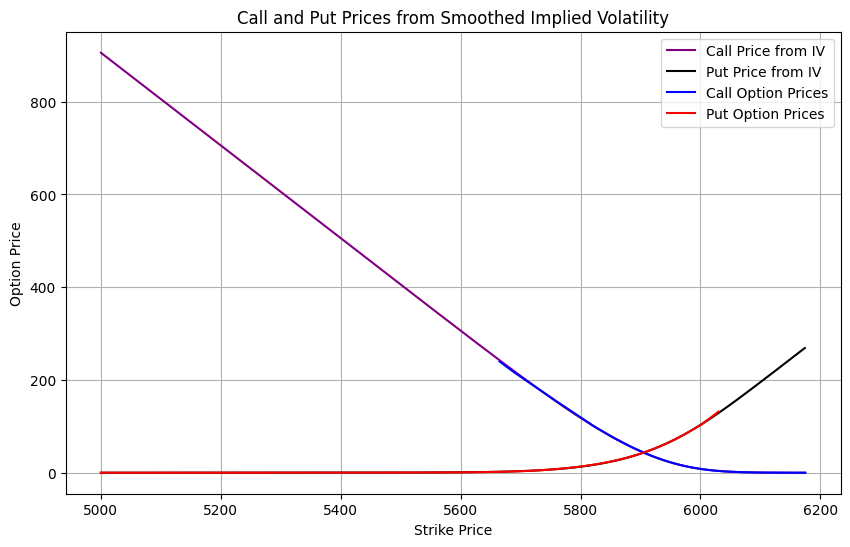

In [85]:
prices_df = compute_prices_from_IV(IV_smooth, S0, T, r, upper_bound=IV_call['strike'].max(), lower_bound=IV_call['strike'].min(), q=q)

plt.figure(figsize=(10, 6))
plt.plot(prices_df['strike'], prices_df['call_price'], label='Call Price from IV', color='purple')
plt.plot(prices_df['strike'], prices_df['put_price'], label='Put Price from IV', color='black')
plt.plot(C['strike'], C['mid'], label='Call Option Prices', color='blue')
plt.plot(P['strike'], P['mid'], label='Put Option Prices', color='red')
plt.title('Call and Put Prices from Smoothed Implied Volatility')
plt.xlabel('Strike Price')
plt.ylabel('Option Price')
plt.legend()
plt.grid()
plt.show()

Now we just: 

$$
f^{\mathbb{Q}}(K) = e^{rT} \cdot \frac{\partial^2 C(K, T)}{\partial K^2}
$$

note: we normalice the gradients, so the $e^{rT}$ is redundant here

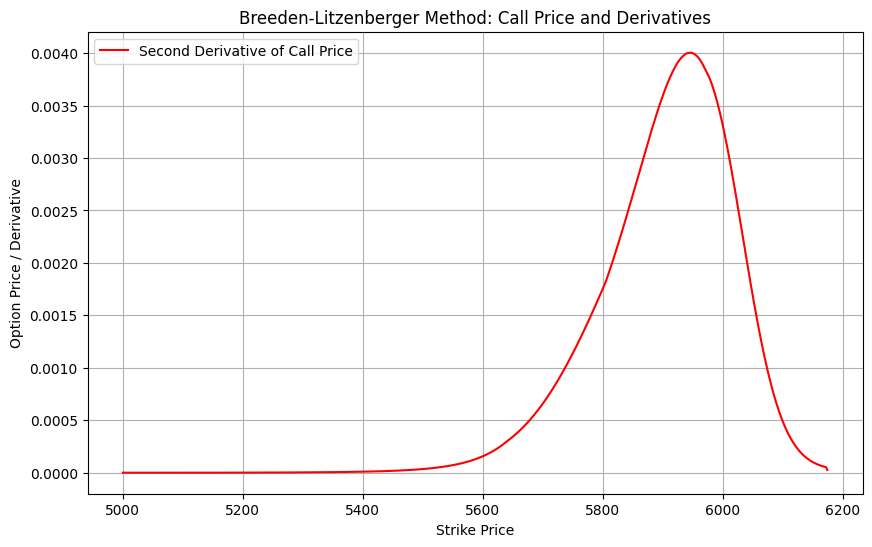

In [86]:
# use breeden litzemberg second derivative of the prices to get the pdf
calls_from_iv = prices_df[['strike', 'call_price']].copy()

dC = np.gradient(calls_from_iv['call_price'], calls_from_iv['strike'])
ddC = np.gradient(dC, calls_from_iv['strike'])

ddC = ddC / np.sum(ddC)

plt.figure(figsize=(10, 6))
#plt.plot(calls_from_iv['strike'], calls_from_iv['call_price'], label='Call Price from IV', color='purple')
# plt.plot(calls_from_iv['strike'], dC, label='First Derivative of Call Price', color='blue')
plt.plot(calls_from_iv['strike'], ddC, label='Second Derivative of Call Price', color='red')
plt.title('Breeden-Litzenberger Method: Call Price and Derivatives')
plt.xlabel('Strike Price')
plt.ylabel('Option Price / Derivative')
plt.legend()
plt.grid()
plt.show()

In [90]:
def get_filtered_option_data(option_data, today, bound_lower, bound_upper):
    """Filter option chain data by recent trades, volume, bid/ask spread, and strike bounds."""
    option_data['lastTradeDate'] = pd.to_datetime(option_data['lastTradeDate']).dt.date
    option_data = option_data[
        (option_data['lastTradeDate'] > today - datetime.timedelta(days=14)) &
        (option_data['volume'] > 10) &
        (option_data['bid'] > 0) &
        (option_data['ask'] > 0)
    ]
    option_data['mid'] = (option_data['bid'] + option_data['ask']) / 2
    option_data = option_data[['strike', 'mid']].sort_values(by='strike')
    return option_data[(option_data['strike'] >= bound_lower) & (option_data['strike'] <= bound_upper)]

def process_expiration_date(date, ticker, S0, today, bound_lower, bound_upper):
    """Process a single expiration date: get data, compute r, IV, PDF."""
    expiration_date = date.strftime('%Y-%m-%d')
    T = (pd.to_datetime(expiration_date) - pd.to_datetime(today)).days / 365.0
    q = 0.0121
    if T >= 1:
        return None

    C = get_filtered_option_data(ticker.option_chain(expiration_date).calls, today, bound_lower, bound_upper)
    P = get_filtered_option_data(ticker.option_chain(expiration_date).puts, today, bound_lower, bound_upper)
    if len(C) < 10 or len(P) < 10:
        print("Insufficient options data for", expiration_date)
        return None

    C_parity, P_parity, r, k_parity = fill_parity_values(S0, C, P, T)
    IV = compute_implied_volatility(C_parity, S0, T, r, q, implied_volatility)

    # Fit spline to implied vol surface
    weights = np.ones(len(IV))
    weights[IV['strike'] > S0] = 4
    IV_smooth = make_splrep(IV['strike'], IV['implied_volatility'], w=weights, s=0.001, k=3)

    # Compute call prices from smoothed IVs
    prices_df = compute_prices_from_IV(IV_smooth, S0, T, r, bound_upper, bound_lower, q)
    call_prices = prices_df[['strike', 'call_price']].copy()

    # Estimate PDF using second derivative of call prices
    dC = np.gradient(call_prices['call_price'], call_prices['strike'])
    ddC = np.gradient(dC, call_prices['strike'])
    pdf_vals = ddC / np.sum(ddC)
    pdf = pd.DataFrame({'strike': call_prices['strike'], 'pdf': pdf_vals})
    pdf['expiration_date'] = date

    return {
        'r': (date, r),
        'call_prices': C_parity[['strike', 'mid']],
        'IV': IV,
        'IV_spline': IV_smooth,
        'pdf': pdf
    }

# Main loop
def process_all_expirations(expiration_date_all, ticker, S0, today, bound_lower=3000, bound_upper=9000):
    all_PDFs, all_call_prices, all_IVs, all_IVs_splines, all_r = [], [], [], [], []

    for date in expiration_date_all:
        print("Processing expiration date:", date)
        result = process_expiration_date(date, ticker, S0, today, bound_lower, bound_upper)
        if result is None:
            continue
        all_r.append(result['r'])
        all_call_prices.append(result['call_prices'])
        all_IVs.append(result['IV'])
        all_IVs_splines.append(result['IV_spline'])
        all_PDFs.append(result['pdf'])

    return {
        'PDFs': pd.concat(all_PDFs, ignore_index=True),
        'call_prices': all_call_prices,
        'IVs': all_IVs,
        'IV_splines': all_IVs_splines,
        'r_values': all_r
    }

# Example usage
results = process_all_expirations(expiration_date_all, ticker, S0, today)
all_PDFs = results['PDFs']
all_IVs = results['IVs']
all_IVs_splines = results['IV_splines']
all_call_prices = results['call_prices']
all_r = results['r_values']

Processing expiration date: 2025-06-04


C:\Users\danie\AppData\Local\Temp\ipykernel_13916\1529459875.py:43: RuntimeWarning: invalid value encountered in divide
  pdf_vals = ddC / np.sum(ddC)


Processing expiration date: 2025-06-05


C:\Users\danie\AppData\Local\Temp\ipykernel_13916\1529459875.py:43: RuntimeWarning: invalid value encountered in divide
  pdf_vals = ddC / np.sum(ddC)


Processing expiration date: 2025-06-06
Processing expiration date: 2025-06-09
Processing expiration date: 2025-06-10
Processing expiration date: 2025-06-11
Processing expiration date: 2025-06-12
Processing expiration date: 2025-06-13
Processing expiration date: 2025-06-16
Processing expiration date: 2025-06-17
Processing expiration date: 2025-06-18
Processing expiration date: 2025-06-20
Processing expiration date: 2025-06-23
Processing expiration date: 2025-06-24
Insufficient options data for 2025-06-24
Processing expiration date: 2025-06-25
Processing expiration date: 2025-06-26
Insufficient options data for 2025-06-26
Processing expiration date: 2025-06-27
Processing expiration date: 2025-06-30
Processing expiration date: 2025-07-01
Insufficient options data for 2025-07-01
Processing expiration date: 2025-07-02
Insufficient options data for 2025-07-02
Processing expiration date: 2025-07-03
Processing expiration date: 2025-07-07
Insufficient options data for 2025-07-07
Processing expi

We are getting the implied risk free rate from doing the Put Call parity. Lets visualice it. In reality this number should be constant and around 4.4%. But in reality...

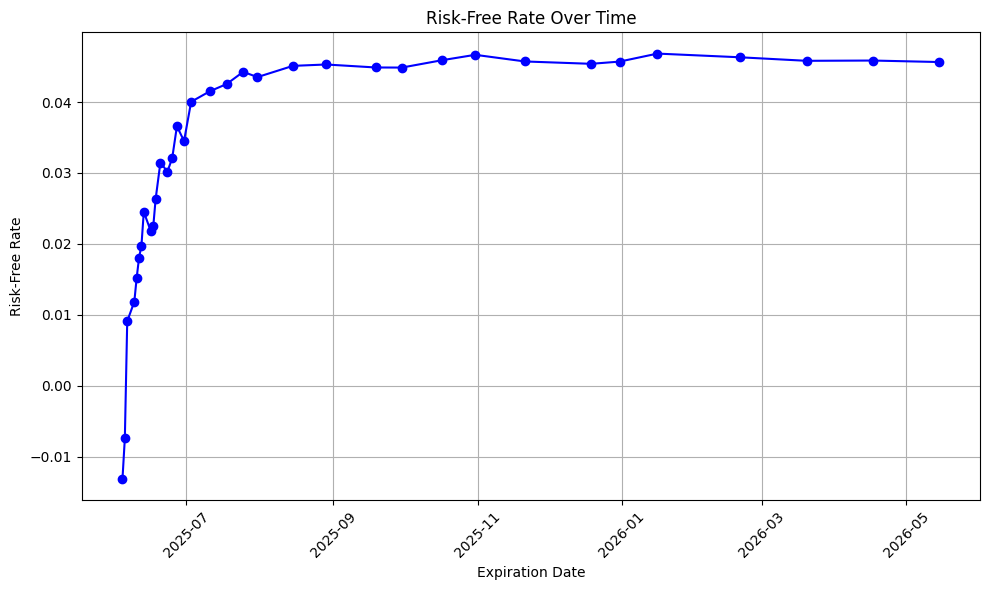

In [91]:
# plot all_r where all pdfs expiration dates
rs = np.array([r[1] for r in all_r])
plt.figure(figsize=(10, 6))
plt.plot(all_PDFs['expiration_date'].unique(), rs, marker='o', linestyle='-', color='blue')
plt.title('Risk-Free Rate Over Time')
plt.xlabel('Expiration Date')
plt.ylabel('Risk-Free Rate')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


Lets check all the PDFs :D

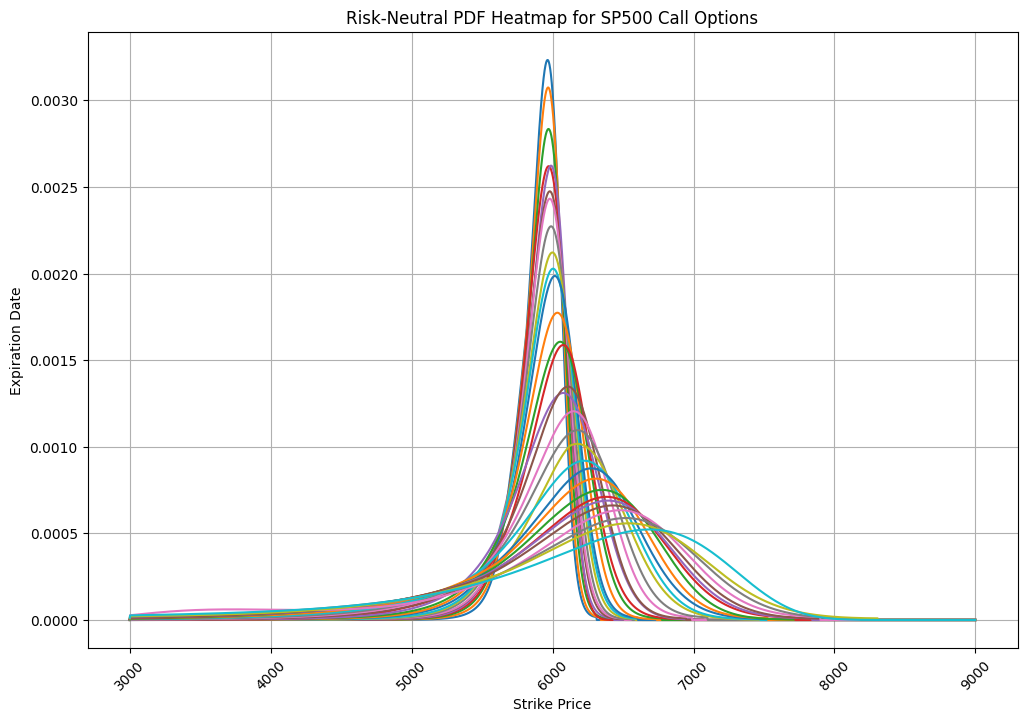

In [92]:
# plot all pdfs
plt.figure(figsize=(12, 8))
for date in all_PDFs['expiration_date'].unique():
    pdf_subset = all_PDFs[all_PDFs['expiration_date'] == date]
    if (max(pdf_subset['pdf']) < 0.1) and (min(pdf_subset['pdf']) > -0.001) \
        and pdf_subset['pdf'].iloc[0] < 0.0001 and pdf_subset['pdf'].iloc[-1] < 0.0001:
        plt.plot(pdf_subset['strike'], pdf_subset['pdf'], label=date)
    else:
        #drop the pdf
        all_PDFs = all_PDFs[all_PDFs['expiration_date'] != date]
plt.title('Risk-Neutral PDF Heatmap for SP500 Call Options')
plt.xlabel('Strike Price')
plt.ylabel('Expiration Date')
plt.xticks(rotation=45)
plt.grid()
plt.show()

Now lets vizualice it in a nice way, with percentile bands:

C:\Users\danie\AppData\Local\Temp\ipykernel_13916\1965748026.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.0))


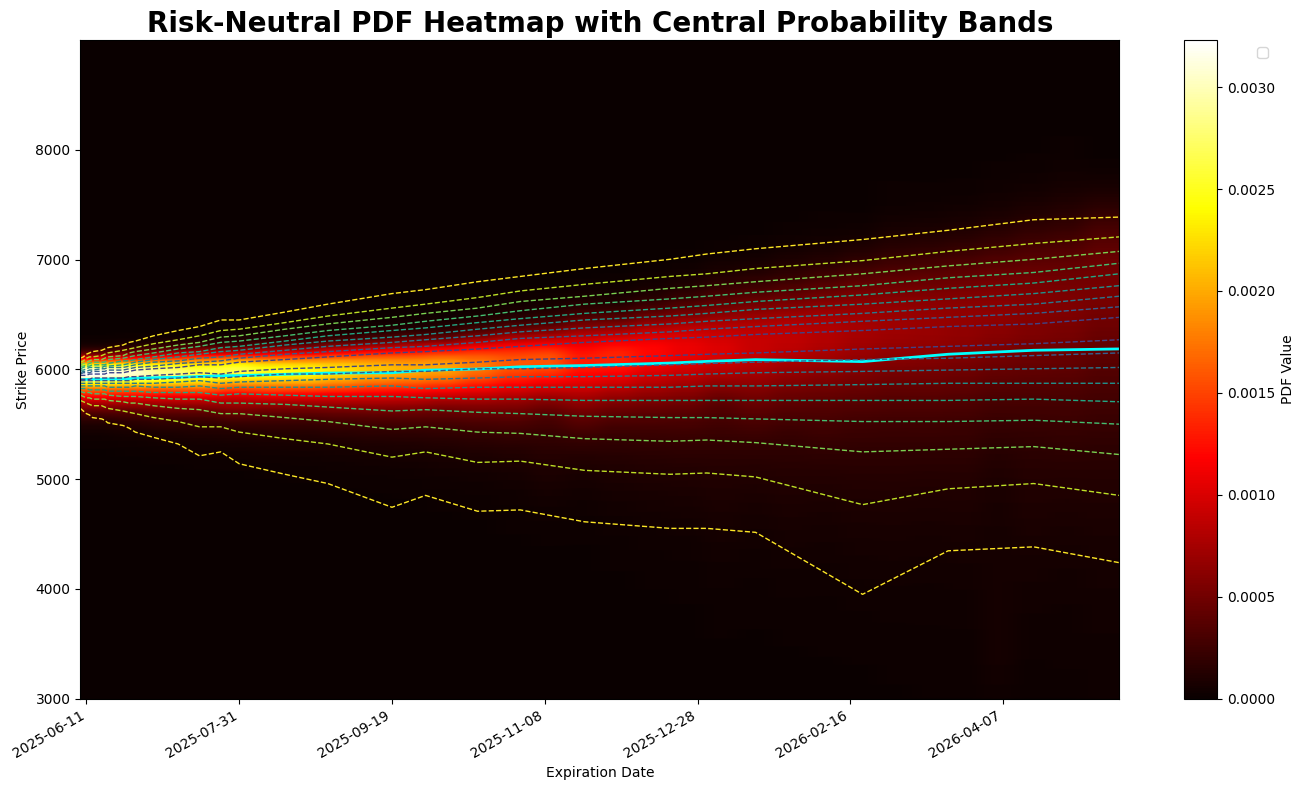

In [93]:
import matplotlib.dates as mdates
from scipy.interpolate import interp1d

# === 1. Define common strike grid ===
strike_min = all_PDFs['strike'].min()
strike_max = all_PDFs['strike'].max()
common_strikes = np.linspace(strike_min, strike_max, 500)

# === 2. Setup ===
# Ensure dates are datetime objects and sorted
all_PDFs['expiration_date'] = pd.to_datetime(all_PDFs['expiration_date'])
unique_dates = sorted(all_PDFs['expiration_date'].unique())
date_nums = mdates.date2num(unique_dates)  # Convert to numeric dates for plotting

pdf_matrix = []
means = []
bands = {p: [] for p in range(10, 100, 10)}  # e.g., 10%, 20%, ..., 90% bands

# === 3. Process each expiration date ===
for date in unique_dates:
    pdf_subset = all_PDFs[all_PDFs['expiration_date'] == date]
    
    # Interpolate PDF on common strike grid
    interp_func = interp1d(pdf_subset['strike'], pdf_subset['pdf'], bounds_error=False, fill_value=0.0)
    pdf_values = interp_func(common_strikes)
    
    # Normalize PDF
    pdf_values /= np.trapezoid(pdf_values, common_strikes)
    pdf_matrix.append(pdf_values)
    
    # Mean
    mean = np.trapezoid(common_strikes * pdf_values, common_strikes)
    means.append(mean)

    # CDF
    cdf = np.cumsum(pdf_values)
    cdf /= cdf[-1]

    # Percentile bands
    for p in range(10, 100, 10):
        lower_p = (1 - p / 100) / 2
        upper_p = 1 - lower_p
        lower_idx = np.searchsorted(cdf, lower_p)
        upper_idx = np.searchsorted(cdf, upper_p)
        lower_bound = common_strikes[lower_idx] if lower_idx < len(common_strikes) else common_strikes[-1]
        upper_bound = common_strikes[upper_idx] if upper_idx < len(common_strikes) else common_strikes[-1]
        bands[p].append((lower_bound, upper_bound))

# Convert list to array
pdf_matrix = np.array(pdf_matrix)

# === 4. Plot transposed heatmap ===
plt.figure(figsize=(14, 8))

plt.imshow(pdf_matrix.T, aspect='auto',
           extent=[date_nums[0], date_nums[-1], strike_min, strike_max],
           origin='lower', cmap='hot')

# === 5. Overlay mean line ===
plt.plot(date_nums, means, color='cyan', lw=2)

# === 6. Overlay percentile bands ===
colors = plt.cm.viridis(np.linspace(0.2, 1, 9))
for i, p in enumerate(range(10, 100, 10)):
    lowers = [b[0] for b in bands[p]]
    uppers = [b[1] for b in bands[p]]
    plt.plot(date_nums, lowers, color=colors[i], linestyle='--', lw=1)
    plt.plot(date_nums, uppers, color=colors[i], linestyle='--', lw=1)

# === 7. Final plot adjustments ===
plt.colorbar(label='PDF Value')
plt.ylabel('Strike Price')
plt.xlabel('Expiration Date')
plt.title('Risk-Neutral PDF Heatmap with Central Probability Bands', fontsize=20, fontweight='bold')

# Format x-axis as dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()

plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.0))
plt.tight_layout()
plt.show()

Another nie visualization, but this time with historical prices. Note that we have a PDF that is no perfect and has a spike

Last day of SPX data: 2025-05-30
First expiration date in all_PDFs: 2025-06-09


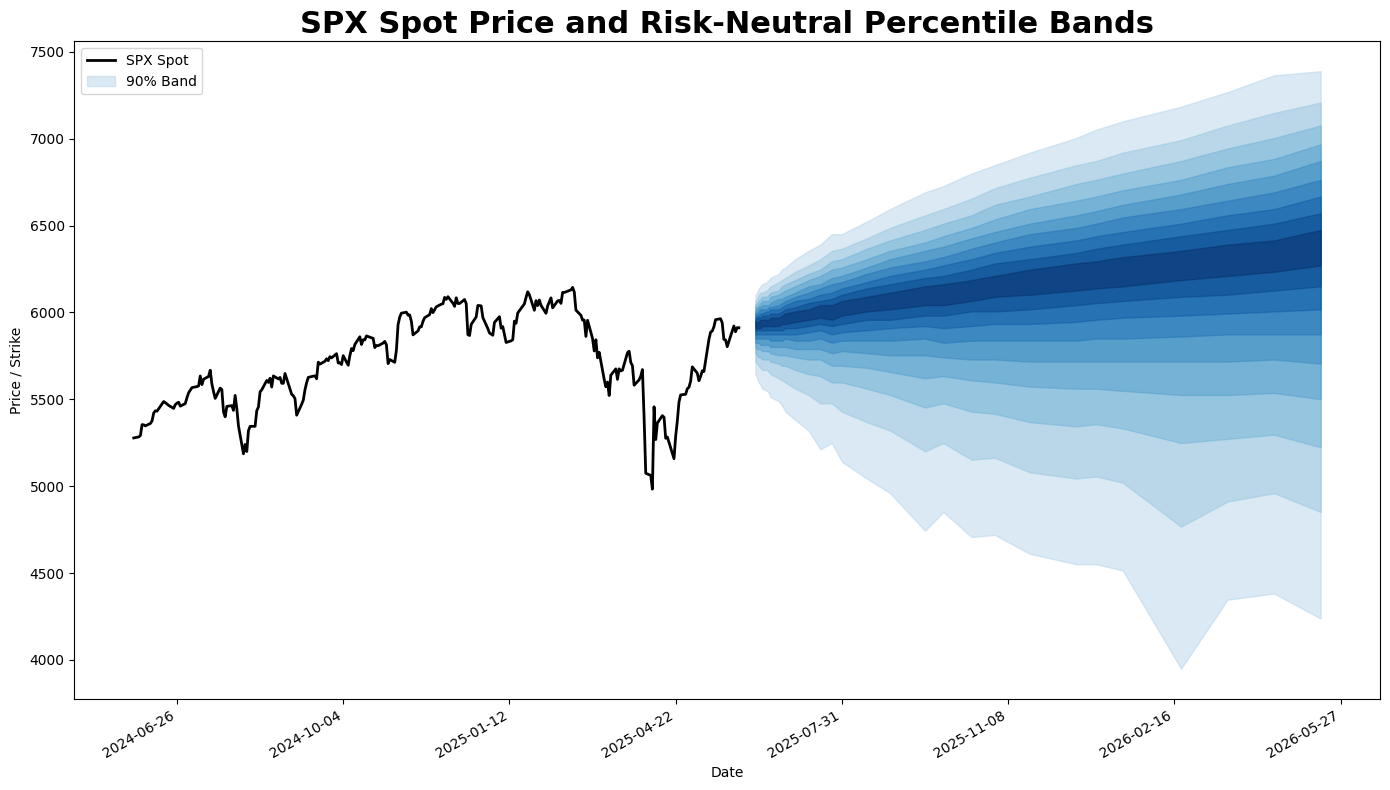

In [95]:
from matplotlib.colors import to_rgba

# print last day of spx
print("Last day of SPX data:", yf.Ticker('^GSPC').history(period='1d').index[-1].date())
# print first date of bands/pdf/expiration dates
print("First expiration date in all_PDFs:", pd.to_datetime(all_PDFs['expiration_date'].min()).date())

# === 1. Download SPX historical data ===
spx = yf.Ticker('^GSPC')
spx_data = spx.history(period='1y')

# === 2. Assume you already have all_PDFs DataFrame ===
# It should contain: ['expiration_date', 'strike', 'pdf']
# all_PDFs = ...

# === 3. Normalize dates to daily (no time, no timezone) ===
spx_data.index = pd.to_datetime(spx_data.index.date)
all_PDFs['expiration_date'] = pd.to_datetime(all_PDFs['expiration_date'].dt.date)

# === 4. Prepare common strike grid ===
strike_min = all_PDFs['strike'].min()
strike_max = all_PDFs['strike'].max()
common_strikes = np.linspace(strike_min, strike_max, 500)

unique_dates = sorted(all_PDFs['expiration_date'].unique())
date_nums = mdates.date2num(unique_dates)

pdf_matrix = []
means = []
bands = {p: [] for p in range(10, 100, 10)}

# === 5. Build PDF matrix, means, and percentile bands ===
for date in unique_dates:
    pdf_subset = all_PDFs[all_PDFs['expiration_date'] == date]
    interp_func = interp1d(pdf_subset['strike'], pdf_subset['pdf'], bounds_error=False, fill_value=0.0)
    pdf_values = interp_func(common_strikes)
    pdf_values /= np.trapezoid(pdf_values, common_strikes)
    pdf_matrix.append(pdf_values)
    mean = np.trapezoid(common_strikes * pdf_values, common_strikes)
    means.append(mean)
    
    cdf = np.cumsum(pdf_values)
    cdf /= cdf[-1]
    for p in range(10, 100, 10):
        lower_p = (1 - p / 100) / 2
        upper_p = 1 - lower_p
        lower_idx = np.searchsorted(cdf, lower_p)
        upper_idx = np.searchsorted(cdf, upper_p)
        lower_bound = common_strikes[lower_idx] if lower_idx < len(common_strikes) else common_strikes[-1]
        upper_bound = common_strikes[upper_idx] if upper_idx < len(common_strikes) else common_strikes[-1]
        bands[p].append((lower_bound, upper_bound))

# === 6. Plot SPX price and percentile bands ===
fig, ax = plt.subplots(figsize=(14, 8))

# SPX price up to first expiration date
first_band_date = unique_dates[0]
spx_data_filtered = spx_data[spx_data.index <= first_band_date]
spot_dates = mdates.date2num(spx_data_filtered.index)
spot_prices = spx_data_filtered['Close']
ax.plot(spot_dates, spot_prices, label='SPX Spot', color='black', lw=2)

# Filled bands using Blues
blues = plt.cm.Blues(np.linspace(0.3, 1, 9))
for i, p in enumerate(range(90, 0, -10)):  # Outer to inner
    lowers = np.array([b[0] for b in bands[p]])
    uppers = np.array([b[1] for b in bands[p]])
    band_dates = date_nums
    ax.fill_between(band_dates, lowers, uppers,
                    color=to_rgba(blues[i], alpha=0.5),
                    label=f'{p}% Band' if p == 90 else None)

# === 7. Final touches ===
ax.set_ylabel('Price / Strike')
ax.set_xlabel('Date')
# set blond the title
ax.set_title('SPX Spot Price and Risk-Neutral Percentile Bands', fontsize=22, fontweight='bold')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()
ax.legend(loc='upper left')
plt.tight_layout()
plt.show()


And this is just to create a nice viz:

MovieWriter imagemagick unavailable; using Pillow instead.


Plotting PDF for frame 0
Plotting PDF for frame 0
Plotting PDF for frame 0
Plotting PDF for frame 0
Plotting PDF for frame 0
Plotting PDF for frame 0
Plotting PDF for frame 0
Plotting PDF for frame 0
Plotting PDF for frame 0
Plotting PDF for frame 0
Plotting PDF for frame 1
Plotting PDF for frame 1
Plotting PDF for frame 2
Plotting PDF for frame 2
Plotting PDF for frame 3
Plotting PDF for frame 3
Plotting PDF for frame 4
Plotting PDF for frame 4
Plotting PDF for frame 5
Plotting PDF for frame 5
Plotting PDF for frame 6
Plotting PDF for frame 6
Plotting PDF for frame 7
Plotting PDF for frame 7
Plotting PDF for frame 8
Plotting PDF for frame 8
Plotting PDF for frame 9
Plotting PDF for frame 9
Plotting PDF for frame 10
Plotting PDF for frame 10
Plotting PDF for frame 11
Plotting PDF for frame 11
Plotting PDF for frame 12
Plotting PDF for frame 12
Plotting PDF for frame 13
Plotting PDF for frame 13
Plotting PDF for frame 14
Plotting PDF for frame 14
Plotting PDF for frame 15
Plotting PDF f

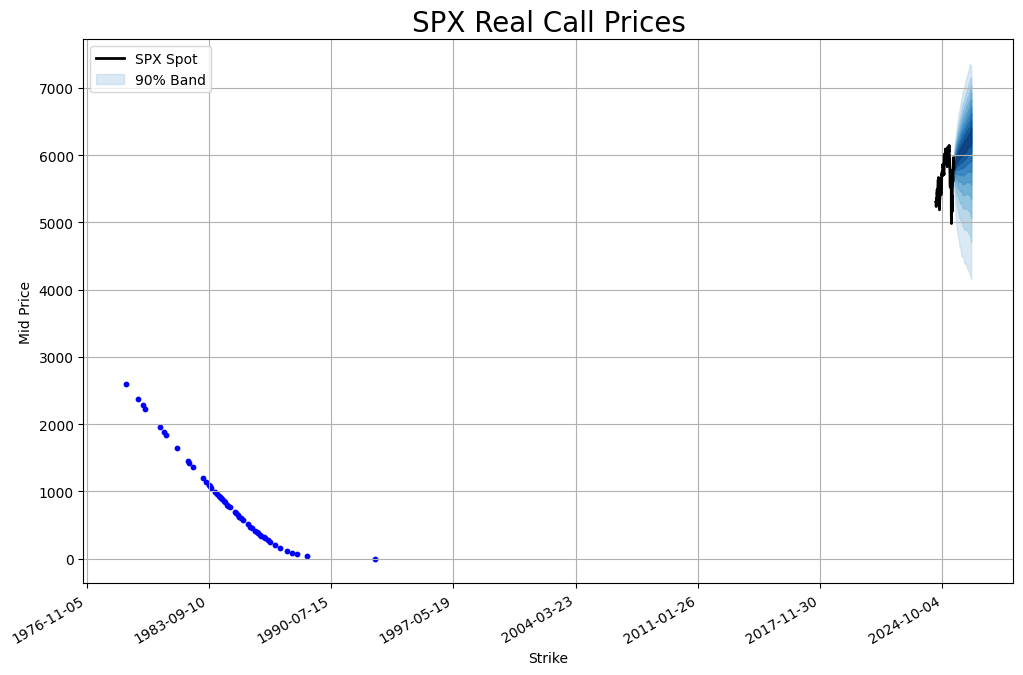

: 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.interpolate import splev, splrep, interp1d
from matplotlib.dates import date2num, DateFormatter
from matplotlib.colors import LogNorm
from matplotlib.gridspec import GridSpec

# Create the animation
fig, ax = plt.subplots(figsize=(12, 8))
frames = []
# STEP 1: Scatter Plot Call Prices
def make_plot(call_data=all_call_prices[33], frame=None):
    #ax.clear()
    ax.set_title("SPX Real Call Prices", fontsize=20)
    ax.set_xlabel("Strike")
    ax.set_ylabel("Mid Price")
    ax.scatter(call_data['strike'], call_data['mid'], s=10, color='blue')
    ax.grid(True)
frames.extend([make_plot] * 10)  # 1-second pause

# # STEP 2: Line Plot of Call Prices
# def plot_call_line():
#     # ax.clear()
#     ax.set_title("Call Prices (Line)")
#     ax.set_xlabel("Strike")
#     ax.set_ylabel("Mid Price")
#     ax.plot(all_call_prices[33]['strike'], all_call_prices[33]['mid'], color='blue', linewidth=2)
#     ax.grid(True)

# frames.extend([plot_call_line] * 10)  # 1-second pause

# STEP 3: Plot Implied Vols
def plot_ivs():
    ax.clear()
    ax.set_title("SPX Implied Volatilities (IVs)", fontsize=20)
    ax.set_xlabel("Strike")
    ax.set_ylabel("Implied Volatility")
    iv_data = all_IVs[33]  
    ax.scatter(iv_data['strike'], iv_data['implied_volatility'], s=10, color='red')
    ax.grid(True)

frames.extend([plot_ivs] * 10)  # 1-second pause

# STEP 4: Fitted Volatility Smile
def plot_smile():
    ax.set_title("SPX Fitted Implied Volatility", fontsize=20)
    ax.set_xlabel("Strike")
    ax.set_ylabel("IV")
    iv_data = all_IVs[33]  # Use the same IV data for consistency
    spline = all_IVs_splines[33]  # Use the same spline for consistency
    kss = np.linspace(iv_data['strike'].min(), iv_data['strike'].max(), 200)
    iv_spline = splev(kss, spline)
    ax.plot(kss, iv_spline, color = 'red')
    ax.grid(True)

frames.extend([plot_smile] * 10)  # 1-second pause

# STEP 6: Risk-Neutral PDFs for All Maturities
for frame in range(0, len(all_PDFs['expiration_date'].unique())):
    pdfs_drawn = False  # Flag to check if PDFs have been drawn
    def make_plot(all_PDFs=all_PDFs, frame=frame):  # Reuse the make_plot function for each PDF
        global pdfs_drawn  # Use the global flag to control drawing
        if pdfs_drawn:
            return
        def plot_all_pdfs():
            if frame == 0:
                ax.clear()
            print(f"Plotting PDF for frame {frame}")
            ax.set_title("Implied PDF of SPX for time to maturity: " + str(all_PDFs['expiration_date'].unique()[frame].date()), fontsize=20)
            ax.set_xlabel("Strike")
            ax.set_ylabel("PDF")
            pdf_subset = all_PDFs[all_PDFs['expiration_date'] == all_PDFs['expiration_date'].unique()[frame]]
            ax.plot(pdf_subset['strike'], pdf_subset['pdf'], color='black', label=pdf_subset['expiration_date'].iloc[0])
            ax.grid(True)
        pdfs_drawn = True  # Set the flag to True to avoid redrawing
        return plot_all_pdfs
    if frame > 0:
        frames.extend([make_plot()] * 2)  # 1-second pause
    else:
        frames.extend([make_plot()] * 10)
# Add this flag outside the function
# colorbar_added = False

bands_ploted = False
def plot_spx_with_bands():
    global bands_ploted  # Use a global flag to control plotting
    if bands_ploted:    
        return
    ax.clear()
    
    # === Setup for plotting ===
    strike_min = all_PDFs['strike'].min()
    strike_max = all_PDFs['strike'].max()
    common_strikes = np.linspace(strike_min, strike_max, 500)

    unique_dates = sorted(all_PDFs['expiration_date'].unique())
    date_nums = mdates.date2num(unique_dates)

    pdf_matrix = []
    means = []
    bands = {p: [] for p in range(10, 100, 10)}

    for date in unique_dates:
        pdf_subset = all_PDFs[all_PDFs['expiration_date'] == date]
        interp_func = interp1d(pdf_subset['strike'], pdf_subset['pdf'], bounds_error=False, fill_value=0.0)
        pdf_values = interp_func(common_strikes)
        pdf_values /= np.trapezoid(pdf_values, common_strikes)
        pdf_matrix.append(pdf_values)

        cdf = np.cumsum(pdf_values)
        cdf /= cdf[-1]
        for p in range(10, 100, 10):
            lower_p = (1 - p / 100) / 2
            upper_p = 1 - lower_p
            lower_idx = np.searchsorted(cdf, lower_p)
            upper_idx = np.searchsorted(cdf, upper_p)
            lower_bound = common_strikes[lower_idx] if lower_idx < len(common_strikes) else common_strikes[-1]
            upper_bound = common_strikes[upper_idx] if upper_idx < len(common_strikes) else common_strikes[-1]
            bands[p].append((lower_bound, upper_bound))

    # Plot SPX spot price until first band date
    spx_filtered = spx_data[spx_data.index <= unique_dates[0]]
    spot_dates = mdates.date2num(spx_filtered.index)
    spot_prices = spx_filtered['Close']
    ax.plot(spot_dates, spot_prices, label='SPX Spot', color='black', lw=2)

    # Filled bands using Blues
    blues = plt.cm.Blues(np.linspace(0.3, 1, 9))
    for i, p in enumerate(range(90, 0, -10)):
        lowers = np.array([b[0] for b in bands[p]])
        uppers = np.array([b[1] for b in bands[p]])
        band_dates = date_nums
        ax.fill_between(band_dates, lowers, uppers,
                        color=to_rgba(blues[i], alpha=0.5),
                        label=f'{p}% Band' if p == 90 else None)

    ax.set_title('SPX Spot Price and Risk-Neutral Percentile Bands', fontsize=22, fontweight='bold')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price / Strike')
    ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
    fig.autofmt_xdate()
    ax.legend(loc='upper left')
    ax.grid(True)
    bands_ploted = True  # Set the flag to True to avoid redrawing

# Add the band plot as final frame (for 1 second = 15 frames at 15 fps)
frames.extend([plot_spx_with_bands] * 50)

# Animation update function
def update(frame_func):
    frame_func()

# Create and save animation
ani = animation.FuncAnimation(fig, update, frames=frames, repeat=False, interval=100)
ani.save('option_analysis_animation.gif', writer='imagemagick', fps=15)